# Analyze Bitcoin Price Data
https://www.kaggle.com/datasets/kannapat/btc-usd-historical-price-2014-2024?resource=download
https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

In [79]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [80]:
# Read the CSV file into a DataFrame
bitcoin = pd.read_csv('btcusd_1-min_data.csv')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [81]:
# Process the data

# Convert the 'datetime' column to datetime objects
bitcoin['datetime'] = pd.to_datetime(bitcoin['datetime'], format='%Y-%m-%d %H:%M:%S')

# downsample the data to daily frequency using the 'datetime' column and get the Open column
bitcoin_daily = bitcoin.resample('D', on='datetime').agg({
    'Open': 'first',  # First open price of the day
    'High': 'max',   # Highest price of the day
    'Low': 'min',    # Lowest price of the day
    'Close': 'last', # Last close price of the day
    'Volume': 'sum'  # Total volume for the day
}).reset_index()

# convert the 'datetime' column to date objects
bitcoin_daily['date'] = bitcoin_daily['datetime'].dt.date

print(f'Data starts from: {bitcoin_daily["date"].min()}')
print(f'Data ends on: {bitcoin_daily["date"].max()}')

Data starts from: 2012-01-01
Data ends on: 2025-03-15


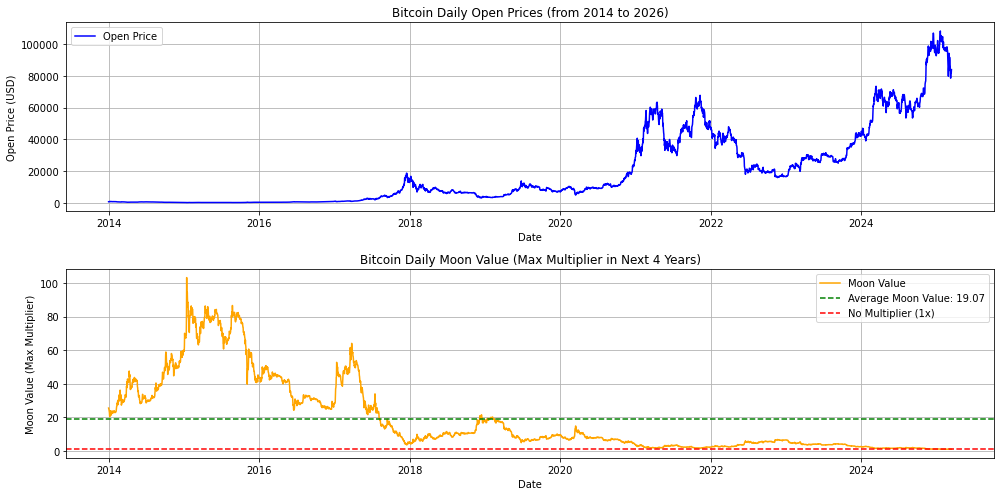

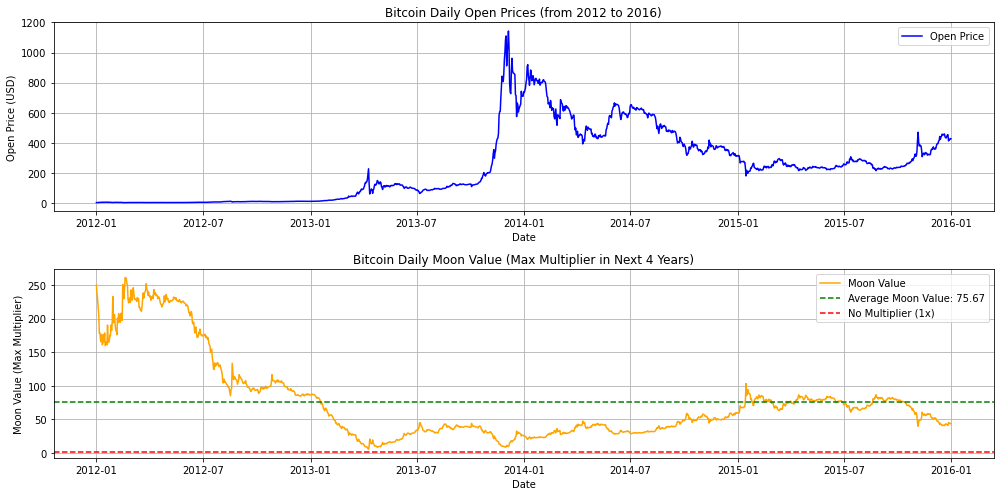

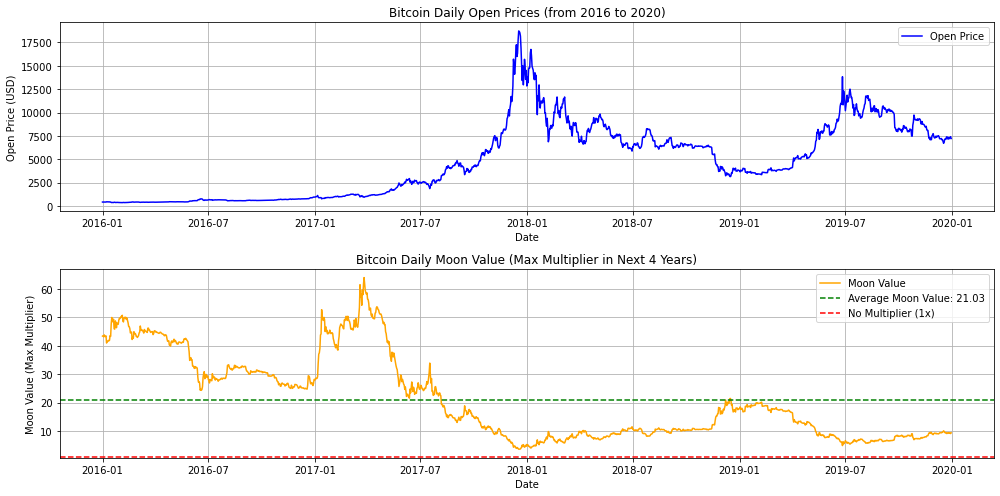

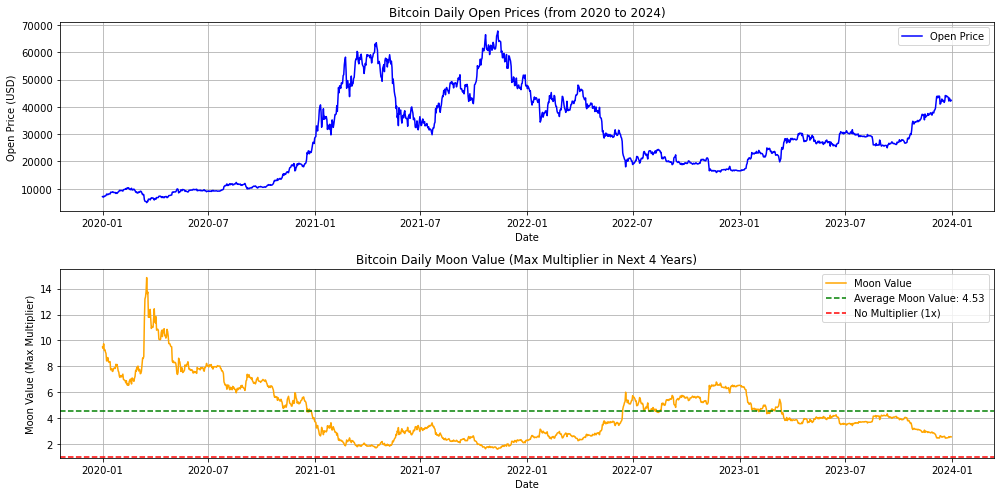

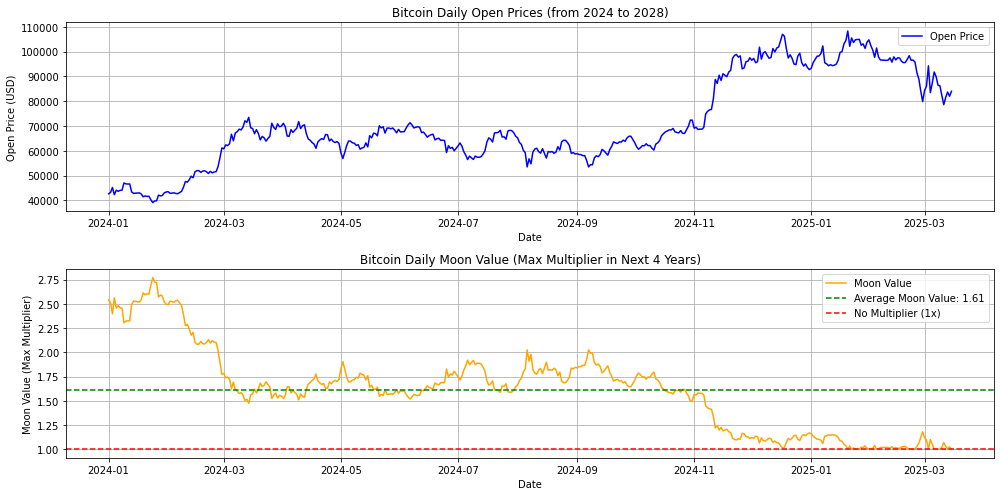

In [86]:

def to_the_moon_value(bitcoin_daily: pd.DataFrame, start_year: int = 2014, end_year: int = 2026, years: float = 5) -> pd.DataFrame:
    """
    For each open price in the DataFrame, this function calculates the maximum multiplier for future open prices
    within the specified number of years.
    :param bitcoin_daily: DataFrame containing Bitcoin daily data
    :param years: Number of years to look forward (default is 5)
    :return: DataFrame with a new column indicating the condition
    """
    # Create a new column to track the value
    bitcoin_daily['moon_value'] = 1.0  # Initialize with 1 to indicate no multiplier by default
    # Loop through the DataFrame
    for i in range(len(bitcoin_daily)):
        # Get the current open price
        current_open = bitcoin_daily.loc[i, 'Open']
        index_range = np.arange(i, min(bitcoin_daily.shape[0], i + int(365 * years)))  # Calculate the range of future indices to check
        bitcoin_daily.at[i, 'moon_value'] = (bitcoin_daily.loc[index_range, 'Open'] / current_open).max()
    
    return bitcoin_daily

def plot_moon_value(bitcoin_daily: pd.DataFrame, start_year: int = 2012, end_year: int = 2028, years: float = 5) -> None:
    """
    This function plots the Bitcoin daily open prices and the calculated moon values over a specified range of years.
    :param bitcoin_daily: DataFrame containing Bitcoin daily data
    :param start_year: The starting year for the plot (default is 2014)
    :param end_year: The ending year for the plot (default is 2026)
    :param years: Number of years to look forward for calculating the moon value (default is 5)
    """
    
    # Filter the data for the specified range of years
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year-1}-12-31')
    bitcoin_filtered = bitcoin_daily[(bitcoin_daily['date'] >= start_date.date()) & (bitcoin_daily['date'] <= end_date.date())]

    # Plot the open prices and moon values on two subplots with shared x-axis
    plt.figure(figsize=(14, 7))
    # Plot the open prices
    plt.subplot(2, 1, 1)
    plt.plot(bitcoin_filtered['datetime'], bitcoin_filtered['Open'], label='Open Price', color='blue')
    plt.title(f'Bitcoin Daily Open Prices (from {start_year} to {end_year})')
    plt.xlabel('Date')
    plt.ylabel('Open Price (USD)')
    plt.legend()
    plt.grid()
    # Plot the moon values on the second subplot
    plt.subplot(2, 1, 2)
    plt.plot(bitcoin_filtered['datetime'], bitcoin_filtered['moon_value'], label='Moon Value', color='orange')
    # plot the average line for the moon value
    avg_moon_value = bitcoin_filtered['moon_value'].mean()
    plt.axhline(y=avg_moon_value, color='green', linestyle='--', label=f'Average Moon Value: {avg_moon_value:.2f}')
    # plot 1 line for reference
    plt.axhline(y=1, color='red', linestyle='--', label='No Multiplier (1x)')  # Reference line for no multiplier
    plt.title(f'Bitcoin Daily Moon Value (Max Multiplier in Next {years} Years)')
    plt.xlabel('Date')
    plt.ylabel('Moon Value (Max Multiplier)')
    plt.legend()
    plt.grid()
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plots

    return

years = 4
bitcoin_daily = to_the_moon_value(bitcoin_daily, years=years)
plot_moon_value(bitcoin_daily, start_year=2014, end_year=2026, years=years)
plot_moon_value(bitcoin_daily, start_year=2012, end_year=2016, years=years)
plot_moon_value(bitcoin_daily, start_year=2016, end_year=2020, years=years)
plot_moon_value(bitcoin_daily, start_year=2020, end_year=2024, years=years)
plot_moon_value(bitcoin_daily, start_year=2024, end_year=2028, years=years)

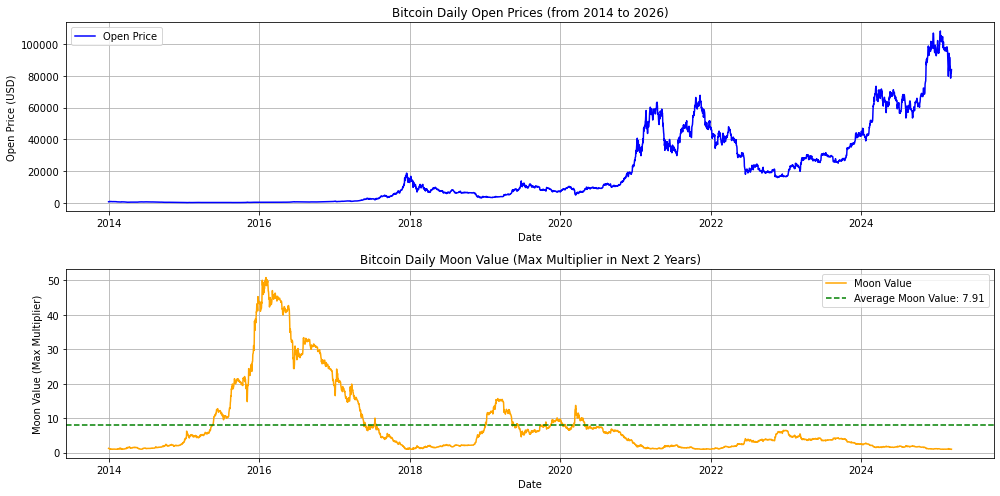

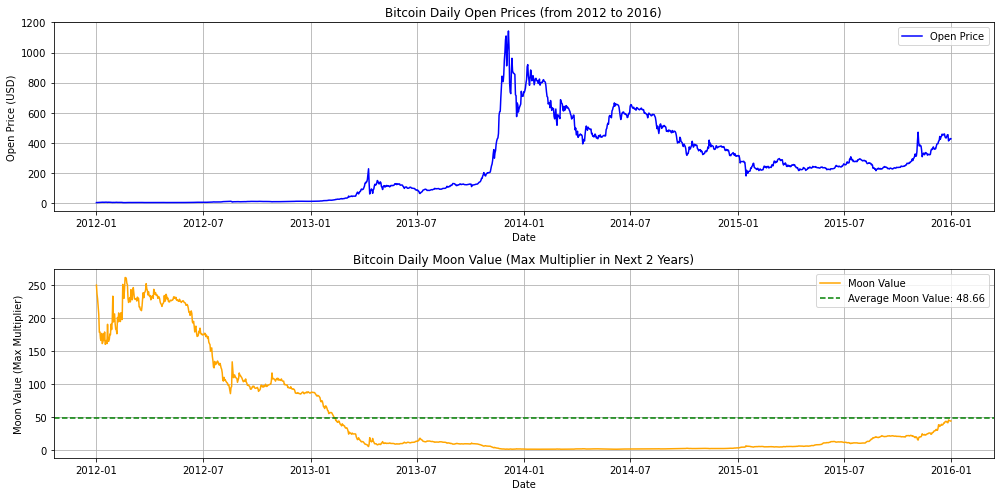

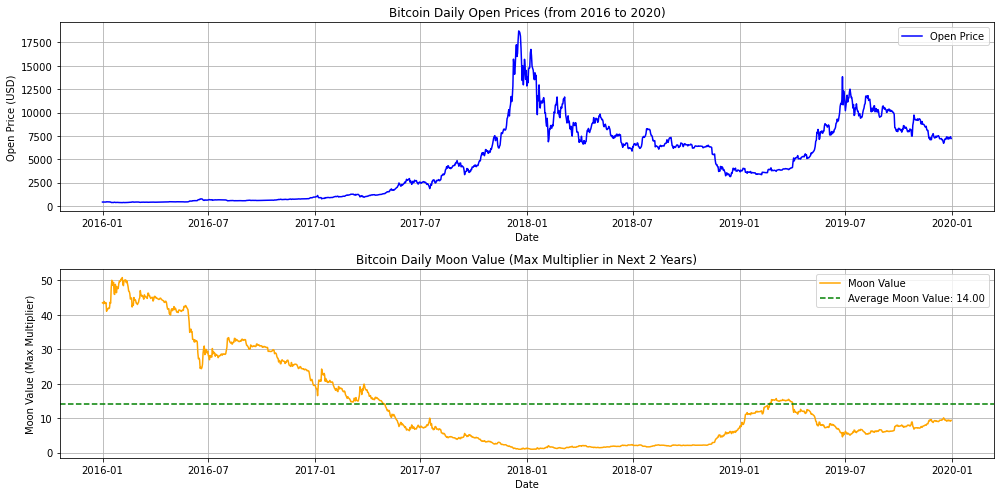

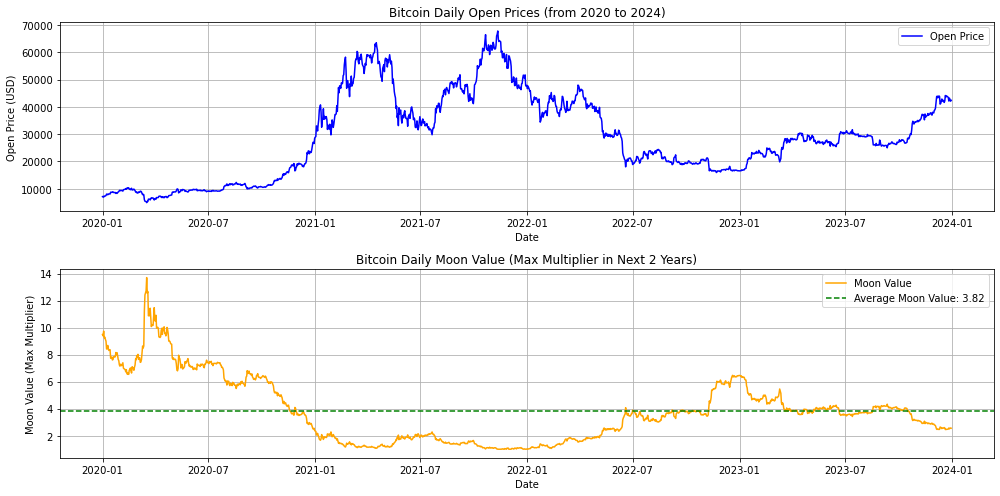

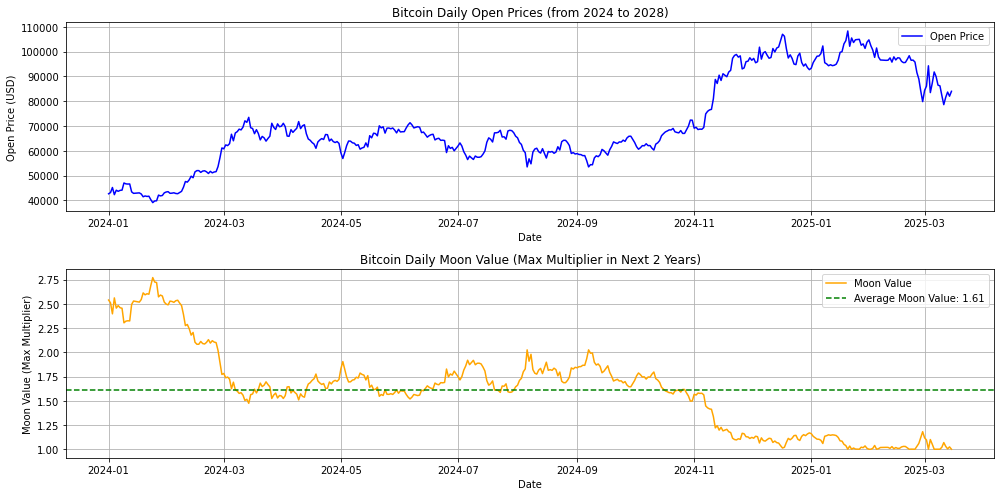

In [85]:
years = 2
bitcoin_daily = to_the_moon_value(bitcoin_daily, years=years)
plot_moon_value(bitcoin_daily, start_year=2014, end_year=2026, years=years)
plot_moon_value(bitcoin_daily, start_year=2012, end_year=2016, years=years)
plot_moon_value(bitcoin_daily, start_year=2016, end_year=2020, years=years)
plot_moon_value(bitcoin_daily, start_year=2020, end_year=2024, years=years)
plot_moon_value(bitcoin_daily, start_year=2024, end_year=2028, years=years)